In [158]:
# from google.colab import drive
# drive.mount('/content/drive')

**Telco Customer Churn Prediction**

Telco receives a lot of customers who subscribe to their service to get access to the fastest possible
communication access through mobile and internet services. There are diverse set of applications which Telco
gives to their users such as mobile services and communication tools to name a few.


 **Problem definition**

One of the challenges that the company faces is to get to know beforehand whether a customer who has
activated a service under Telco is going to leave or stay in the service (churn). If they know that a customer is
going to leave the service based on a set of factors such as Gender and whether they are Senior citizen or not,
they can come up with affordable plans or give promotional offers so that they retain the customer without them
having to move to options from other companies

**GOAL**

The goal of the project is to develop a predictive churn analysis model for Telco company.

**Importing Neccessary libraries**

In [159]:
# !pip install ydata-profiling

In [160]:
## importing necessary dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from scipy.stats import ttest_ind
import statsmodels as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from  sklearn.linear_model import LogisticRegression
# from verstack import NaNImputer
from yellowbrick.target import class_balance
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,QuantileTransformer,OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score , confusion_matrix
from yellowbrick.classifier import confusion_matrix
plt.rcParams['axes.facecolor']="#DCDCDC"
plt.rcParams['axes.grid']=1
pd.set_option('display.max_columns',None)
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from ydata_profiling import ProfileReport
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd




In [161]:
## loading the data
Telco_churn_data = pd.read_csv(r"D:\JT_analytics\datasets\archive\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [162]:
## checking the first five rows
Telco_churn_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [163]:
## checking the last five rows
Telco_churn_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [164]:
## checcking the shape of the of the data
Telco_churn_data.shape


(7043, 21)

In [165]:
## checking for general info
Telco_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [166]:
## checking the columns names
Telco_churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [167]:
## checking for duplicates
Telco_churn_data.duplicated(keep='first').sum()

0

In [168]:
## checking for missing values
Telco_churn_data.isnull().mean()*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [169]:
## checking for descriptive statistcs
Telco_churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


**Key Insights from the Numeric descriptive statistics**
- Only 16.2% of customers are senior citizens
- Average customer stays for about 32 months (2.7 years)
- 25% of customers stay less than 9 months
- 50% of customers stay around 29 months
- 75% of customers stay up to 55 months
- Average monthly charge is $64.76
- 50% of customers pay between $35.50 and $89.85

In [170]:
## checking categorical data
Telco_churn_data.describe(include=['object'])


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


**Outlier Detection for Numeric Variables**


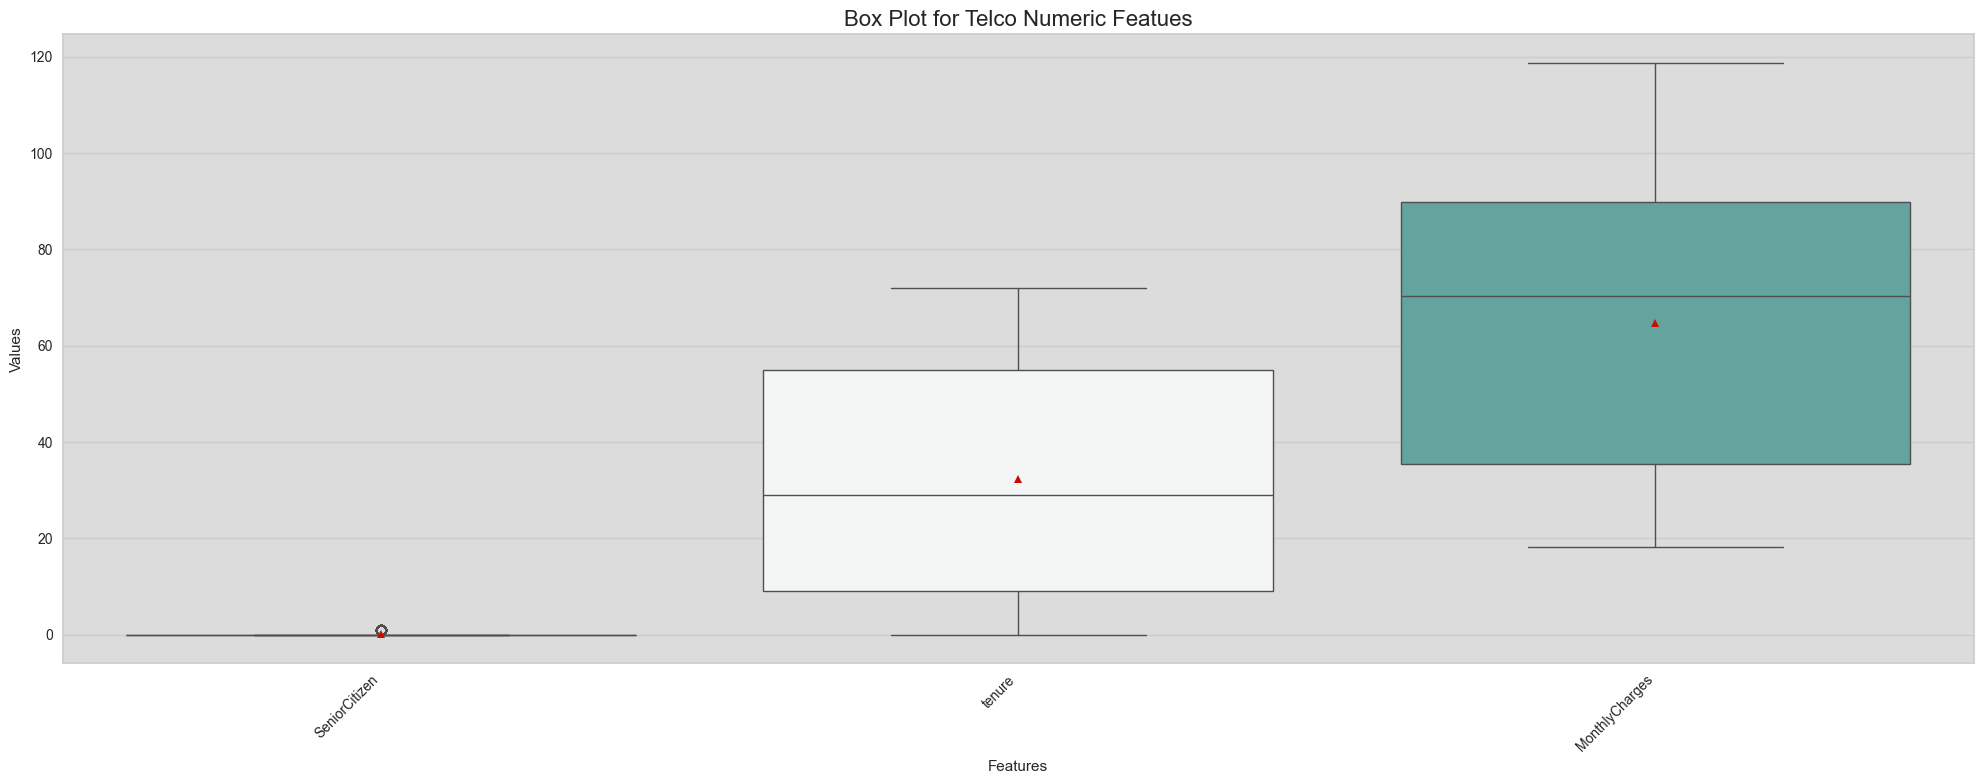

In [171]:
## creating boxplots

plt.figure(figsize=(20, 8))
ax = sns.boxplot(data=Telco_churn_data,showmeans=True, palette='BrBG')

# Set plot title and labels
plt.title('Box Plot for Telco Numeric Featues', fontsize=16)
plt.xlabel('Features')
plt.ylabel('Values')

# Set y-axis to logarithmic scale
# ax.set_yscale('log')

# Improve layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save and show plot
plt.show()

**EXPLORATIVE DATA ANALYSIS (EDA)**
- we start by Iniating the Pandas Profiler to give an insights of our dataset

In [172]:
## Loading the Pandas Profiler
profile_report =  ProfileReport(
    Telco_churn_data,
    title="Customized Report",
    minimal=False,
    explorative=True,


)

profile_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Gender column**

In [173]:
## checking for unique values
Telco_churn_data['gender'].unique()


array(['Female', 'Male'], dtype=object)

In [174]:
## checking for value counts
gender_counts = Telco_churn_data['gender'].value_counts(normalize=True).reset_index()
gender_counts

,gender,proportion
0,Male,0.504756
1,Female,0.495244


In [175]:


# Rename columns for clarity
gender_counts.columns = ['Gender', 'Percentage']

# Create a bar chart
fig = px.bar(
    gender_counts,
    x='Gender',
    y='Percentage',
    title='Normalized Value Counts of Genders',
    text='Percentage',
    labels={'Percentage': 'Proportion'},
    color='Gender',
    color_discrete_sequence=px.colors.qualitative.Antique
)

# Update layout for better readability
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.update_layout(
    yaxis_tickformat=".0%",
    xaxis_title="Gender",
    yaxis_title="Proportion",
    template="ggplot2+seaborn",
    showlegend=False

)

fig.show()


**Key observaitons**
- We see that there are equal number of male and female in our data
- Therefore, the 2 groups are represented equally to understand their overall behavior towards Telco


**Partner Count**

In [176]:
## checking for unique values in partner count
Telco_churn_data['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [177]:
## checking the counts
patner_counts = Telco_churn_data['Partner'].value_counts(normalize=True).reset_index()
## print
patner_counts

,Partner,proportion
0,No,0.516967
1,Yes,0.483033


In [178]:


# Rename columns for clarity
patner_counts.columns = ['Partner', 'Percentage']

# Create a bar chart
fig = px.bar(
    patner_counts,
    x='Partner',
    y='Percentage',
    title='Normalized Value Counts of Partners',
    text='Percentage',
    labels={'Percentage': 'Proportion'},
    color='Partner',
    color_discrete_sequence=px.colors.qualitative.Antique
)

# Update layout for better readability
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.update_layout(
    yaxis_tickformat=".0%",
    xaxis_title="Partner",
    yaxis_title="Proportion",
    template="ggplot2+seaborn",
    showlegend=False

)

fig.show()


**Key Observations**
-  There are more number of people who do not have partners compared to the ones who have partners.
-  Since we have more data for the people who do not have partners, we should be able to predict their
behavior and determine well whether they would leave the telco service or not.

**Internet Service Column**


In [179]:
## checking for unique values
Telco_churn_data['InternetService'].unique()


array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [180]:
internet_service_counts = Telco_churn_data['InternetService'].value_counts(normalize=True).reset_index()
internet_service_counts

,InternetService,proportion
0,Fiber optic,0.439585
1,DSL,0.343746
2,No,0.216669


In [181]:


# Rename columns for clarity
internet_service_counts.columns = ['InternetService', 'Percentage']

# Create a bar chart
fig = px.bar(
    internet_service_counts,
    x='InternetService',
    y='Percentage',
    title='Normalized Value Counts of InternetServices',
    text='Percentage',
    labels={'Percentage': 'Proportion'},
    color='InternetService',
    color_discrete_sequence=px.colors.qualitative.Antique
)

# Update layout for better readability
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.update_layout(
    yaxis_tickformat=".0%",
    xaxis_title="InternetService",
    yaxis_title="Proportion",
    template="ggplot2+seaborn",
    showlegend=False

)

fig.show()


**observations**
- It could be seen that most of the Telco services are Fiber Optic service as this option is becoming common
among customers


OnlineBankUp Account Column

In [182]:
## checking for unique values
Telco_churn_data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [183]:
## checking for the counts

Online_counts = Telco_churn_data['OnlineBackup'].value_counts(normalize=True).reset_index()
Online_counts

,OnlineBackup,proportion
0,No,0.438450
1,Yes,0.344881
2,No internet service,0.216669


In [184]:


# Rename columns for clarity
Online_counts.columns = ['OnlineBackup', 'Percentage']

# Create a bar chart
fig = px.bar(
    Online_counts,
    x='OnlineBackup',
    y='Percentage',
    title='Normalized Value Counts of OnlineBackup',
    text='Percentage',
    labels={'Percentage': 'Proportion'},
    color='OnlineBackup',
    color_discrete_sequence=px.colors.qualitative.Antique
)

# Update layout for better readability
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.update_layout(
    yaxis_tickformat=".0%",
    xaxis_title="OnlineBackup",
    yaxis_title="Proportion",
    template="ggplot2+seaborn",
    showlegend=False

)

fig.show()


**Key Obseravtions**
- Most people in our data do not prefer Online Backup Services as clearly shown in the above plot.
- There are quite a number of people who do not opt the internet service as well.
- Therefore, we should also consider whether a person has an internet service or not before determining
whether they would prefer online backup

**PaymentMethod**

In [185]:
## checking for unique values
Telco_churn_data['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [186]:
## checking for the counts
Payment_counts = Telco_churn_data['PaymentMethod'].value_counts(normalize=True).reset_index()
Payment_counts

,PaymentMethod,proportion
0,Electronic check,0.335794
1,Mailed check,0.228880
2,Bank transfer (automatic),0.219225
3,Credit card (automatic),0.216101


In [187]:


# Rename columns for clarity
Payment_counts.columns = ['PaymentMethod', 'Percentage']

# Create a bar chart
fig = px.bar(
    Payment_counts,
    x='PaymentMethod',
    y='Percentage',
    title='Normalized Value Counts of PaymentMethod',
    text='Percentage',
    labels={'Percentage': 'Proportion'},
    color='PaymentMethod',
    color_discrete_sequence=px.colors.qualitative.Antique
)

# Update layout for better readability
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.update_layout(
    yaxis_tickformat=".0%",
    xaxis_title="PaymentMethod",
    yaxis_title="Proportion",
    template="ggplot2+seaborn",
    showlegend=False

)

fig.show()


**key Observations**
- A large portion of users from Telco prefer Electronic Check compared to other options
- There are other options which are popular among the customers as well such as Mailed check, Bank transfer (automatic) and Credit card (automatic) respectively
- As a result, we should be able to more accurately predict the behavior of the customers who use the payment
method of electronic check compared to other methods.

**Contract Count**

In [188]:
## checking for the counts in contract count
contract_count = Telco_churn_data['Contract'].value_counts(normalize=True).reset_index()
contract_count


,Contract,proportion
0,Month-to-month,0.550192
1,Two year,0.240664
2,One year,0.209144


In [189]:


# Rename columns for clarity
contract_count.columns = ['Contract', 'Percentage']

# Create a bar chart
fig = px.bar(
    contract_count,
    x='Contract',
    y='Percentage',
    title='Normalized Value Counts of Contract',
    text='Percentage',
    labels={'Percentage': 'Proportion'},
    color='Contract',
    color_discrete_sequence=px.colors.qualitative.Antique
)

# Update layout for better readability
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.update_layout(
    yaxis_tickformat=".0%",
    xaxis_title="Contract",
    yaxis_title="Proportion",
    template="ggplot2+seaborn",
    showlegend=False

)

fig.show()



**Key Observations**
- We have a significantly large portion of the data where the contract is month-to-month compared to either
one-year and two-year contracts.
- This is true in real-life as well because most of the customers prefer to stick with month-to-month contract
rather than staying with the same service for a long period of time.
- Hence, we see that this data is quite reflective of the real-world.

**Churn Countplot**

In [190]:
## checking for the unique elements in the churn column
Telco_churn_data['Churn'].unique()


array(['No', 'Yes'], dtype=object)

In [191]:
## checking for the couunts in churn
churn_count = Telco_churn_data['Churn'].value_counts(normalize=True).reset_index()
churn_count

,Churn,proportion
0,No,0.73463
1,Yes,0.26537


In [192]:


# Rename columns for clarity
churn_count.columns = ['Churn', 'Percentage']

# Create a bar chart
fig = px.bar(
    churn_count,
    x='Churn',
    y='Percentage',
    title='Normalized Value Counts of Churn',
    text='Percentage',
    labels={'Percentage': 'Proportion'},
    color='Churn',
    color_discrete_sequence=px.colors.qualitative.Antique
)

# Update layout for better readability
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.update_layout(
    yaxis_tickformat=".0%",
    xaxis_title="Churn",
    yaxis_title="Proportion",
    template="ggplot2+seaborn",
    showlegend=False

)

fig.show()



**Key Observations**
- The majority of customers (73.46%) stayed
- A smaller portion (26.54%) churned
- This may suggest that the retention strategies  in the company are working well overall but could still benefit from improvement.


In [193]:
## sementing by churn and monthly charges
churn_segmented = Telco_churn_data.groupby('Churn')['MonthlyCharges'].sum().reset_index()

# Create a bar chart
fig = px.bar(
    churn_segmented,
    x="Churn",
    y="MonthlyCharges",
    title="Total Monthly Charges by Churn Category",
    labels={"churn": "Churn", "MonthlyCharges": "Total Monthly Charges"},
    text="MonthlyCharges" ,
    color_discrete_sequence= px.colors.sequential.Oryel
)

# Customize the layout
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')  # Format the displayed values
fig.update_layout(title_font_size=18, xaxis_title="Churn", yaxis_title="Total Monthly Charges")

# Show the plot
fig.show()


**Key Observations**
- The total monthly charges for customers who did not churn ("No") are significantly higher than those for customers who churned ("Yes").
-  This suggests that non-churning customers contribute more revenue overall

**Students T_test to confirm that its statisaclly_significant**


In [194]:
import scipy.stats as stats
# Separate the data into two groups based on churn status
no_churn = Telco_churn_data[Telco_churn_data['Churn'] == 'No']['MonthlyCharges']
yes_churn = Telco_churn_data[Telco_churn_data['Churn'] == 'Yes']['MonthlyCharges']

# Perform the independent t-test
t_stat, p_value = stats.ttest_ind(no_churn, yes_churn)

# Print the result
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation of the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("The difference is statistically significant (reject H0)")
else:
    print("The difference is not statistically significant (fail to reject H0)")


T-statistic: -16.536738015936308
P-value: 2.7066456068884154e-60
The difference is statistically significant (reject H0)


**Key Observations**
- Since we got a statically significant result , it means the Customers who dont churn are performing way better than those who churn

### Total Charges Column

In [195]:
# Identify problematic entries by attempting to convert to float
def is_convertible_to_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Find rows with non-convertible values in TotalCharges
problematic_entries = Telco_churn_data[~Telco_churn_data['TotalCharges'].apply(is_convertible_to_float)]

# Display the problematic rows
problematic_entries


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [196]:


# Add a flag column for rows with blank TotalCharges

Telco_churn_data['NoChargesFlag'] = Telco_churn_data['TotalCharges'].apply(lambda x: 1 if x.strip() == "" else 0)

# Replace blank TotalCharges with 0 for consistency
# Ensure all whitespace is stripped, and replace remaining blanks with "0"
Telco_churn_data['TotalCharges'] = Telco_churn_data['TotalCharges'].str.strip().replace("", "0").astype(float)

# Confirm the changes
Telco_churn_data[['TotalCharges', 'NoChargesFlag']].head(15)


,TotalCharges,NoChargesFlag
0,29.85,0
1,1889.50,0
2,108.15,0
3,1840.75,0
4,151.65,0
5,820.50,0
6,1949.40,0
7,301.90,0
8,3046.05,0
9,3487.95,0


In [197]:
Telco_churn_data['DeviceProtection']

0        No
1       Yes
2        No
3       Yes
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: DeviceProtection, Length: 7043, dtype: object

In [198]:
## Total charges and service delivery 
device_protection_value = Telco_churn_data.groupby('DeviceProtection')['TotalCharges'].sum().reset_index()

# Create a bar chart
fig = px.bar(
    device_protection_value,
    x="DeviceProtection",
    y="TotalCharges",
    title="Total Monthly Charges by DeviceProtection Category",
    labels={"DeviceProtection": "DeviceProtection", "TotalCharges": "TotalCharges"},
    text="TotalCharges" ,
    color_discrete_sequence= px.colors.qualitative.Antique,
    height=600, 
    width=900
)

# Customize the layout
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')  # Format the displayed values
fig.update_layout(title_font_size=18, xaxis_title="DeviceProtection", yaxis_title="Total Monthly Charges")

# Show the plot
fig.show()


### Key Observations 
- Total charges for customers with device protection (Yes) are significantly higher (~9.5M) compared to those without protection (~5.6M).
- Customers labeled as "No internet service" contribute the lowest total charges (~1.0M)
- There is a substantial revenue gap between customers with and without device protection (~3.9M).

In [199]:
## checking for the counts
Internet_service_counts = Telco_churn_data['InternetService'].value_counts(normalize=True).reset_index()
Internet_service_counts

,InternetService,proportion
0,Fiber optic,0.439585
1,DSL,0.343746
2,No,0.216669


In [200]:
## Internet Service againt total charges 
Internet_service_df = Telco_churn_data.groupby('InternetService')['TotalCharges'].sum().reset_index()
Internet_service_df

,InternetService,TotalCharges
0,DSL,5121410.85
1,Fiber optic,9923622.95
2,No,1011134.90


In [201]:

fig = px.bar(
    Internet_service_df,
    x='InternetService',
    y='TotalCharges',
    title='Total Charges by Internet Service Type',
    labels={'TotalCharges': 'Total Charges', 'InternetService': 'Internet Service'},
    text='TotalCharges',
    color='InternetService',
    color_discrete_sequence= px.colors.qualitative.Set3, 
    height=550, 
    width=900 , 
    template='ggplot2+seaborn'
)

# Customize the layout
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis_title='Internet Service Type',
    yaxis_title='Total Charges',
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    showlegend= False
)

# Show the plot
fig.show()


### Key Observations
* Total Charges for customers with Fiber Optic internet service (~9.9M) significantly surpass the other two categories combined.
* This indicates that Fiber Optic services contribute the majority (likely over 80%) of revenue in this dataset.
* DSL contributes significantly less (~5.1M) compared to Fiber Optic but is still a considerable secondary revenue source.
* Customers without internet service have the smallest contribution (~1.0M), indicating limited value to total revenue.

### Statiscal Analysis

In [202]:
# Step 1: Check Normality
for service in Telco_churn_data['InternetService'].unique():
    subset = Telco_churn_data[Telco_churn_data['InternetService'] == service]['TotalCharges']
    stat, p_value = stats.shapiro(subset)
    print(f"{service} - Shapiro Test p-value: {p_value:.3f}")
    if p_value > 0.05:
        print(f"{service}: Data is normally distributed.\n")
    else:
        print(f"{service}: Data is NOT normally distributed.\n")

DSL - Shapiro Test p-value: 0.000
DSL: Data is NOT normally distributed.

Fiber optic - Shapiro Test p-value: 0.000
Fiber optic: Data is NOT normally distributed.

No - Shapiro Test p-value: 0.000
No: Data is NOT normally distributed.



In [203]:
# Step 2: Check Homogeneity of Variance
stat, p_value = stats.levene(
    *(Telco_churn_data[Telco_churn_data['InternetService'] == service]['TotalCharges']
      for service in Telco_churn_data['InternetService'].unique())
)
print(f"Levene's Test p-value: {p_value:.3f}")
if p_value > 0.05:
    print("Variances are equal across groups.\n")
else:
    print("Variances are NOT equal across groups.\n")

Levene's Test p-value: 0.000
Variances are NOT equal across groups.



Kruskal-Wallis Test Statistic: 1252.481, p-value: 0.000
Significant differences exist among the medians of the groups.


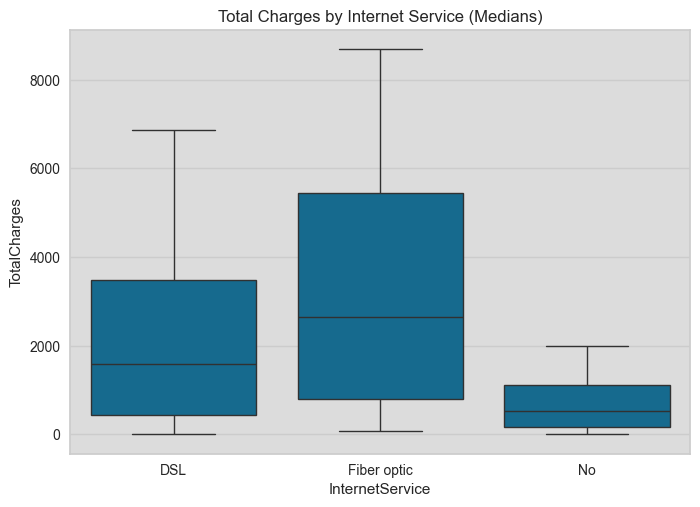

In [204]:

# Perform Kruskal-Wallis Test
stat, p_value = stats.kruskal(
    *(Telco_churn_data[Telco_churn_data['InternetService'] == service]['TotalCharges']
      for service in Telco_churn_data['InternetService'].unique())
)
print(f"Kruskal-Wallis Test Statistic: {stat:.3f}, p-value: {p_value:.3f}")

# Interpret the result
if p_value < 0.05:
    print("Significant differences exist among the medians of the groups.")
else:
    print("No significant differences among the medians of the groups.")

# Visualization
sns.boxplot(x='InternetService', y='TotalCharges', data=Telco_churn_data)
plt.title('Total Charges by Internet Service (Medians)')
plt.show()


In [205]:
from scikit_posthocs import posthoc_dunn

# Pairwise comparisons using Dunn's test
posthoc = posthoc_dunn(
    Telco_churn_data,
    val_col='TotalCharges', 
    group_col='InternetService',
    p_adjust='bonferroni'
)
print(posthoc)


                       DSL    Fiber optic             No
DSL           1.000000e+00   7.542327e-45  4.717007e-108
Fiber optic   7.542327e-45   1.000000e+00  9.291113e-274
No           4.717007e-108  9.291113e-274   1.000000e+00


#### Key observations from the dunn test
* The TotalCharges for Fiber Optic users are significantly higher than DSL users. This indicates Fiber Optic is the primary revenue driver and is valued more by customers.
*  Customers with DSL spend significantly more than those with no internet. This highlights an opportunity to upsell internet services (even basic DSL) to customers in the "No Internet" group.
* Customers using Fiber Optic pay the highest TotalCharges, while those without internet contribute the least. This further reinforces the value of Fiber Optic as a revenue driver.
* Fiber Optic users contribute significantly more revenue than any other group.
* DSL contributes less than Fiber Optic but much more than "No Internet." This makes it an important segment.
* The "No Internet" group contributes the least revenue but offers potential for growth.

In [206]:
## Paper less Billing  
Telco_churn_data['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [207]:
PaperlessBilling_counts = Telco_churn_data['PaperlessBilling'].value_counts().reset_index()
PaperlessBilling_counts

,PaperlessBilling,count
0,Yes,4171
1,No,2872


In [208]:
PaperlessBilling_counts_df = Telco_churn_data.groupby('PaperlessBilling')['MonthlyCharges'].sum().reset_index()
PaperlessBilling_counts_df

,PaperlessBilling,MonthlyCharges
0,No,149323.8
1,Yes,306792.8


In [209]:
import plotly.express as px

# Assuming PaperlessBilling_counts_df is already available
fig = px.bar(
    PaperlessBilling_counts_df,
    x='PaperlessBilling',
    y='MonthlyCharges',
    title='Total Monthly Charges by PaperlessBilling Type',
    labels={'MonthlyCharges': 'Total Charges', 'PaperlessBilling': 'Internet Service'},
    text='MonthlyCharges',
    color='PaperlessBilling',
    color_discrete_sequence=px.colors.qualitative.Set3,
    height=550,
    width=900,
    template='ggplot2+seaborn'
)

# Customize the layout to show exact values with commas for readability
fig.update_traces(texttemplate='%{text:,.2f}', textposition='outside')  # Add commas and show two decimal places
fig.update_layout(
    xaxis_title='PaperlessBilling',
    yaxis_title='Total Monthly Charges',
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    showlegend=False
)

# Show the plot
fig.show()


#### Key Insights 
- Customers who opt for Paperless Billing have significantly higher total monthly charges compared to those who don't.
- The total charges for Paperless Billing customers are 306,792.80 compared to 149,323.80 for non-Paperless Billing customers. This suggests that Paperless Billing might be associated with higher-value services or plans.
-  Paperless Billing customers contribute a larger portion of the total monthly charges.
- With 306,792.80 in monthly charges from Paperless Billing users, they contribute significantly more compared to 149,323.80 from non-Paperless Billing users. This highlights an opportunity to further promote Paperless Billing adoption.
- The business should consider increasing incentives or marketing efforts to encourage more customers to choose Paperless Billing, as it seems linked to higher monthly charges, potentially increasing overall revenue.

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

def barplot_function(dataframe, x_value, y_value, hue=None, title_size=15, label_size=10, figsize=(20, 6), palette='BrBG'):
  
    # Create the figure
    plt.figure(figsize=figsize)

    # Create the barplot
    sns.barplot(x=x_value, y=y_value, data=dataframe, hue=hue, palette=palette)

    # Set labels and title
    plt.xlabel(f"{x_value} Value", fontsize=label_size)
    plt.ylabel(f"{y_value} Value", fontsize=label_size)
    plt.title(f"{x_value} Vs. {y_value} Barplot", fontsize=title_size)

    # Show plot
    plt.tight_layout()  # Ensures layout is adjusted to avoid overlap
    plt.show()



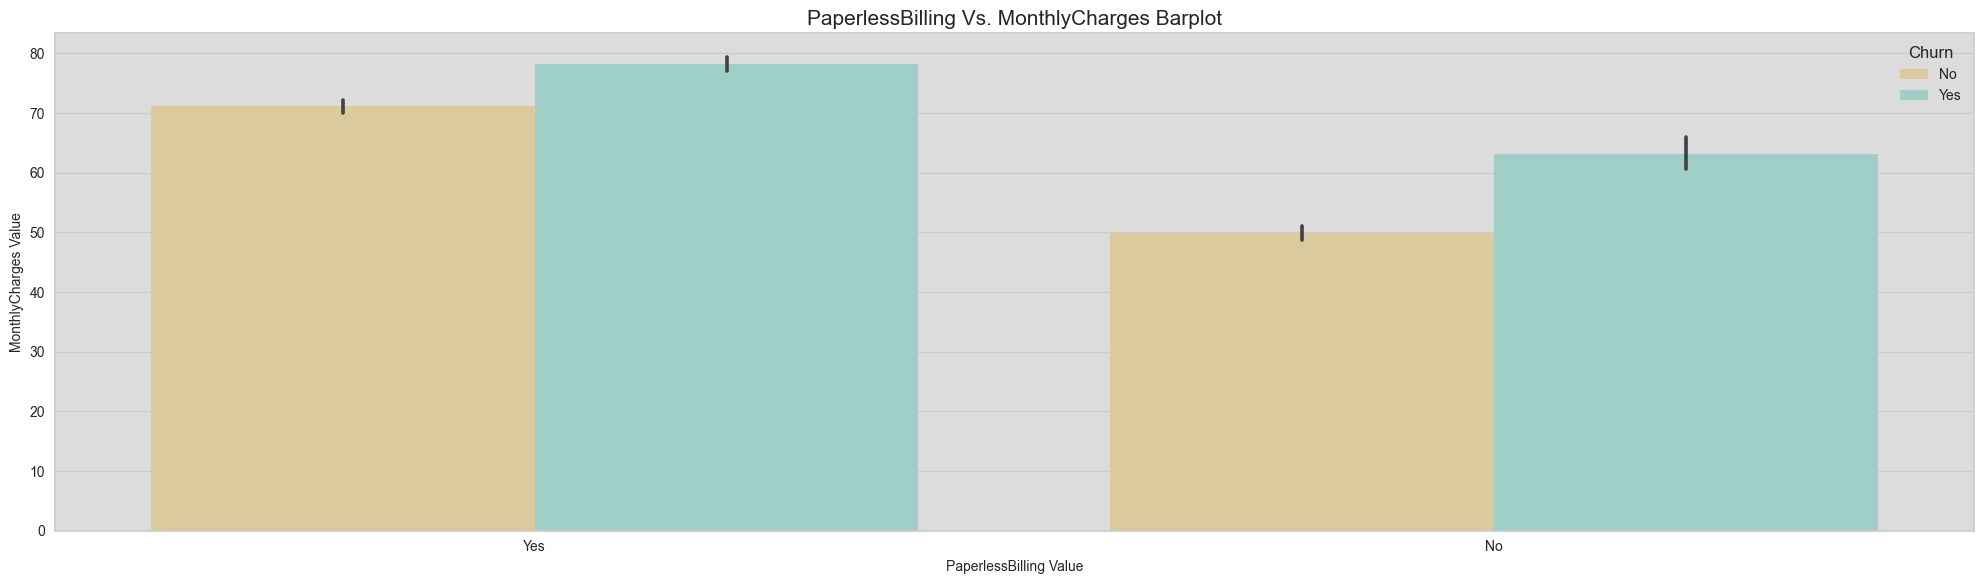

In [211]:
barplot_function(Telco_churn_data ,x_value='PaperlessBilling',y_value='MonthlyCharges',hue='Churn')

### key observations
* Paperless billing customers usually leverage the freedom to use their credit/debit cards and pay more
amount compared to the others who prefer paper billing options.
* This is because it is more convenient to use credit/debit cards to make transaction compared to other services

#### The Senior Citizen Column

In [212]:
## checking for the unique counts  
Telco_churn_data['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [213]:
# 1. Analyze Senior Citizen distribution
senior_dist = (
    Telco_churn_data
    .groupby('SeniorCitizen')
    .size()
    .reset_index(name='Count')
    .assign(Percentage=lambda df: (df['Count'] / df['Count'].sum()) * 100)
)

In [214]:
print(senior_dist)

   SeniorCitizen  Count  Percentage
0              0   5901   83.785319
1              1   1142   16.214681


In [215]:
# 2. Compare Monthly Charges and Churn by SeniorCitizen status
metrics_summary = (
    Telco_churn_data
    .groupby('SeniorCitizen')
    .agg(
        AvgMonthlyCharges=('MonthlyCharges', 'mean'),
        ChurnRate=('Churn', lambda x: (x.eq('Yes').sum() / len(x)) * 100)  # Proportion of 'Yes' in Churn
    )
    .reset_index()
)

print(metrics_summary)

   SeniorCitizen  AvgMonthlyCharges  ChurnRate
0              0          61.847441  23.606168
1              1          79.820359  41.681261


#### defining categorical columns and numerical columns

In [216]:
df_categorical = Telco_churn_data.select_dtypes(include='object')
## Numeric columns colunns 
df_numerric = Telco_churn_data.select_dtypes(exclude='object')


In [217]:
## categorical columns  
df_categorical.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [218]:
df_categorical.drop(['customerID'], axis = 1, inplace = True)

In [219]:
## numeric columns 
df_numerric.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'NoChargesFlag'],
      dtype='object')

In [220]:
categoricla_variables_encoded = pd.get_dummies(data=df_categorical , drop_first=True).astype(int)
## printing the categorical varriables enncoded  
categoricla_variables_encoded


,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0
7039,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0
7040,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7041,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [221]:
## the numeric column  
df_numerric.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,NoChargesFlag
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,0
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,0


In [222]:
## scaling the data 
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_numerric_scaled = scaler.fit_transform(df_numerric)
### checking the scaled numeeric features 
df_numerric_scaled[:5]


array([[ 0.        , -0.60869565, -0.74517019, -0.40279807,  0.        ],
       [ 0.        ,  0.10869565, -0.24655014,  0.14608698,  0.        ],
       [ 0.        , -0.58695652, -0.30358786, -0.37968743,  0.        ],
       [ 0.        ,  0.34782609, -0.51609936,  0.13169817,  0.        ],
       [ 0.        , -0.58695652,  0.00643974, -0.36684819,  0.        ]])

In [223]:
## converting back the data frame format  
df_numeric_df = pd.DataFrame(df_numerric_scaled, columns=df_numerric.columns, index=df_numerric.index)
df_numeric_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,NoChargesFlag
0,0.0,-0.608696,-0.745170,-0.402798,0.0
1,0.0,0.108696,-0.246550,0.146087,0.0
2,0.0,-0.586957,-0.303588,-0.379687,0.0
3,0.0,0.347826,-0.516099,0.131698,0.0
4,0.0,-0.586957,0.006440,-0.366848,0.0
...,...,...,...,...,...
7038,0.0,-0.108696,0.265869,0.175898,0.0
7039,0.0,0.934783,0.604416,1.761589,0.0
7040,0.0,-0.391304,-0.749770,-0.309352,0.0
7041,1.0,-0.543478,0.074517,-0.321114,0.0


In [224]:
### combining the numeric and categorical columns 
df_final = pd.concat([df_numeric_df , categoricla_variables_encoded
],axis=1)
## checking the final
df_final

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,NoChargesFlag,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,-0.608696,-0.745170,-0.402798,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0.0,0.108696,-0.246550,0.146087,0.0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0.0,-0.586957,-0.303588,-0.379687,0.0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0.0,0.347826,-0.516099,0.131698,0.0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0.0,-0.586957,0.006440,-0.366848,0.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,-0.108696,0.265869,0.175898,0.0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0
7039,0.0,0.934783,0.604416,1.761589,0.0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0
7040,0.0,-0.391304,-0.749770,-0.309352,0.0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7041,1.0,-0.543478,0.074517,-0.321114,0.0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


#### BUILDING THE MODEL

In [225]:
## Splitting the variable  
X = df_final.drop(columns=['Churn_Yes','NoChargesFlag'])
y = df_final['Churn_Yes']

In [226]:
## the indepeendent data 
X.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,-0.608696,-0.745170,-0.402798,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0.0,0.108696,-0.246550,0.146087,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0.0,-0.586957,-0.303588,-0.379687,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0.0,0.347826,-0.516099,0.131698,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0.0,-0.586957,0.006440,-0.366848,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [227]:
## The Target Variable  
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_Yes, Length: 7043, dtype: int32

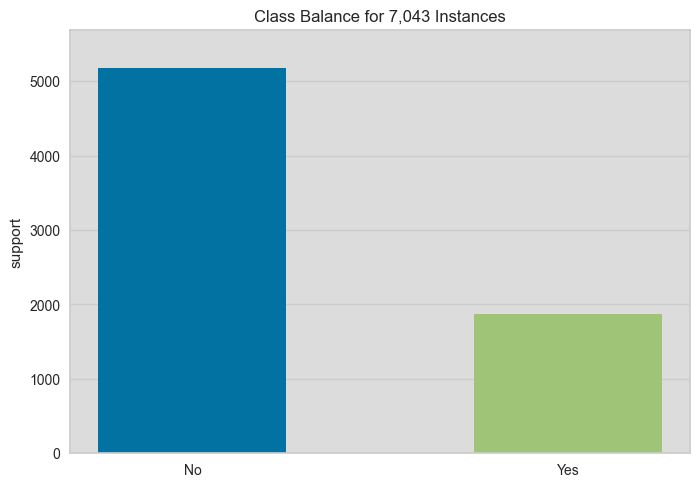

<Axes: title={'center': 'Class Balance for 7,043 Instances'}, ylabel='support'>

In [228]:
### checking the distrubution of the target varaibles 
visualizer = class_balance(y ,labels=['No', 'Yes'])
visualizer.show()

#### Key obseravtions 
- since the data is imbalanced , we need to carry out sampling methods such as smote or RandomUnderSample

In [229]:
## splitting thee data samples 
x_train , x_test , y_train , y_test = train_test_split(X , y,test_size=0.2,random_state=42)

### Class Balancing Using SMOTE

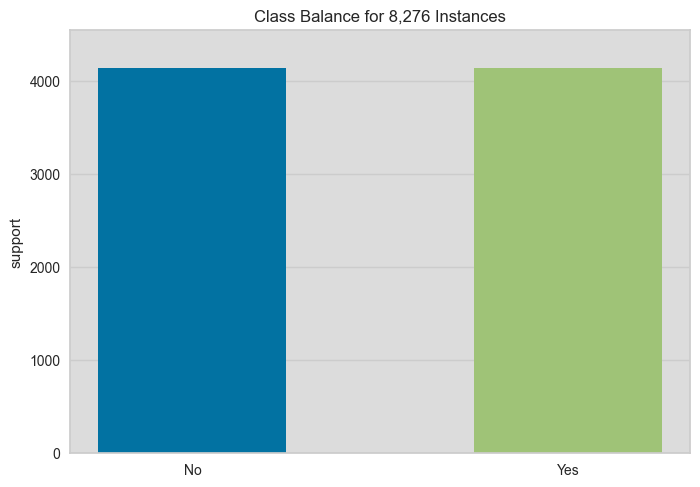

In [230]:
## intializing smote 
smote = SMOTE()
x_train_resample , y_train_resampled = smote.fit_resample(x_train , y_train)
## checking the distribution after being transformed  
visualizer = class_balance(y_train_resampled,labels=['No','Yes'])

##### THE LOGISTIC REGRESSION

In [231]:
## define the modeel 
model = LogisticRegression()
## fit the model  
model.fit(x_train_resample , y_train_resampled)

LogisticRegression()

#### Accuracy for Logistic Regression

In [232]:
## making predictions 
y_pred =   model.predict(x_test)
## calling out thee accuracy attribute 
print(f'The Accuracy for logistic Regression is {accuracy_score(y_pred , y_test)}')

The Accuracy for logistic Regression is 0.7721788502484032


#### The classification Report

In [233]:
from sklearn.metrics import classification_report
print('Classiffication Report for Logistic Regression')
print()
print(classification_report(y_pred , y_test))
print('---------------------------------------------------------------------------------------------------------------------')

Classiffication Report for Logistic Regression

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       875
           1       0.79      0.55      0.65       534

    accuracy                           0.77      1409
   macro avg       0.78      0.73      0.74      1409
weighted avg       0.77      0.77      0.76      1409

---------------------------------------------------------------------------------------------------------------------


#### The confusion matrix 

In [234]:
from sklearn.metrics import confusion_matrix
confusiom_mat = confusion_matrix(y_pred, y_test)
confusiom_mat

array([[795,  80],
       [241, 293]], dtype=int64)

Text(70.72222222222221, 0.5, 'Actual')

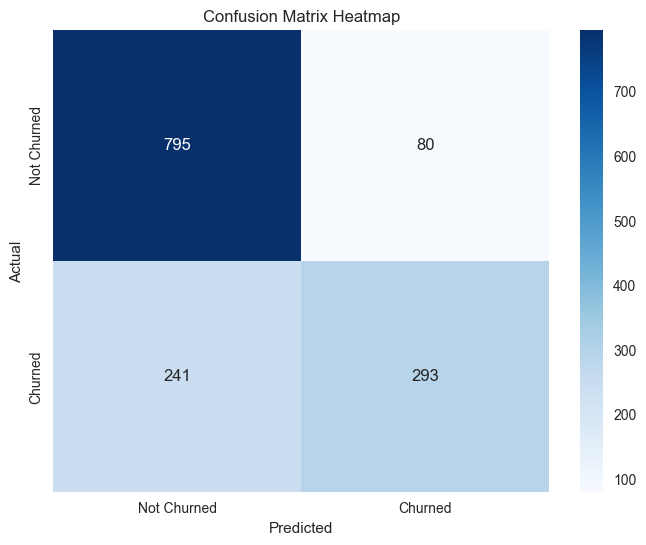

In [235]:
## heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusiom_mat, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [236]:
## The reciever operating chararistics
from sklearn.metrics import roc_curve, roc_auc_score
# Predict probabilities for the positive class
y_pred_proba = model.predict_proba(x_test)[:, 1]

In [237]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.86


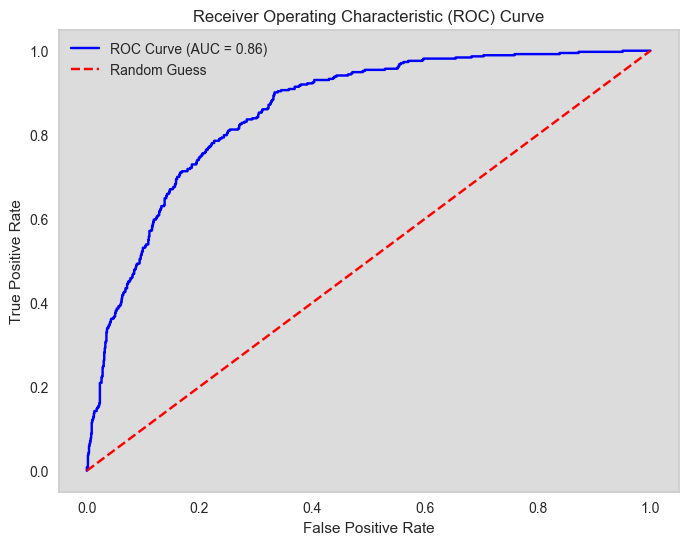

In [238]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Guess")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

#### Random Forest Classifier 

In [239]:
randomforest_classifier =  RandomForestClassifier(random_state=42)
## fit the model 
randomforest_classifier.fit(x_test,y_test)

RandomForestClassifier(random_state=42)

#### Accuracy for Random Forest Classifier

In [240]:
## making predictions 
y_pred_rc =   randomforest_classifier.predict(x_test)
## calling out thee accuracy attribute 
print(f'The Accuracy for Random Forest Classifier is {accuracy_score(y_pred_rc , y_test)}')

The Accuracy for Random Forest Classifier is 0.9992902767920511


### Classification Report for Random Forest Classifier 

In [241]:
from sklearn.metrics import classification_report
print('Classiffication Report for Logistic Regression')
print()
print(classification_report(y_pred_rc , y_test))
print('---------------------------------------------------------------------------------------------------------------------')

Classiffication Report for Logistic Regression

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1037
           1       1.00      1.00      1.00       372

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

---------------------------------------------------------------------------------------------------------------------


##### The Confusion Matrix for Random Forest classifier

In [242]:
from sklearn.metrics import confusion_matrix
confusiom_mat = confusion_matrix(y_pred_rc, y_test)
confusiom_mat

array([[1036,    1],
       [   0,  372]], dtype=int64)

Text(70.72222222222221, 0.5, 'Actual')

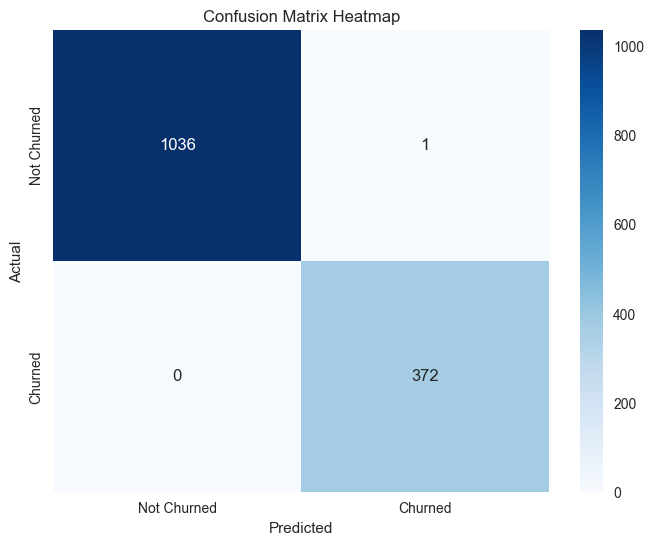

In [243]:
## heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusiom_mat, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')

#### THE ROC CURVE FOR RANDOM FOREST REGRESSOR

In [244]:
## The reciever operating chararistics
from sklearn.metrics import roc_curve, roc_auc_score
# Predict probabilities for the positive class
y_pred_proba = randomforest_classifier.predict_proba(x_test)[:, 1]

In [245]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 1.00


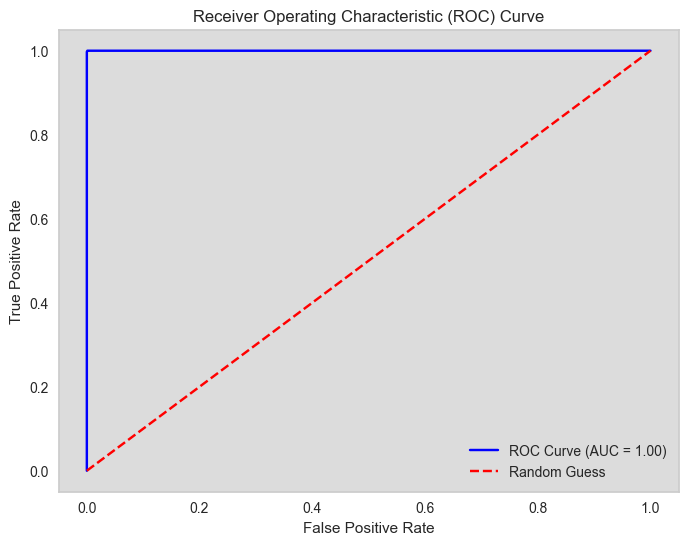

In [246]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Guess")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

#### SVM

In [247]:
## intilaize svm 
from sklearn.svm import SVC
svc_classifier = SVC(probability=True)
## fitting the model 
svc_classifier.fit(x_train_resample,y_train_resampled)

SVC(probability=True)

### The Accuracy for support vector classifier

In [248]:
## making predictions 
y_pred_rc =   svc_classifier.predict(x_test)
## calling out thee accuracy attribute 
print(f'The Accuracy for Random Forest Classifier is {accuracy_score(y_pred_rc , y_test)}')

The Accuracy for Random Forest Classifier is 0.7672107877927609


#### Classification Report for SVM

In [249]:
from sklearn.metrics import classification_report
print('Classiffication Report for Logistic Regression')
print()
print(classification_report(y_pred_rc , y_test))
print('---------------------------------------------------------------------------------------------------------------------')

Classiffication Report for Logistic Regression

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       888
           1       0.76      0.54      0.63       521

    accuracy                           0.77      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.77      0.77      0.76      1409

---------------------------------------------------------------------------------------------------------------------


#### Confusion  Matric for SVM

In [250]:
from sklearn.metrics import confusion_matrix
confusiom_mat = confusion_matrix(y_pred_rc, y_test)
confusiom_mat

array([[798,  90],
       [238, 283]], dtype=int64)

Text(70.72222222222221, 0.5, 'Actual')

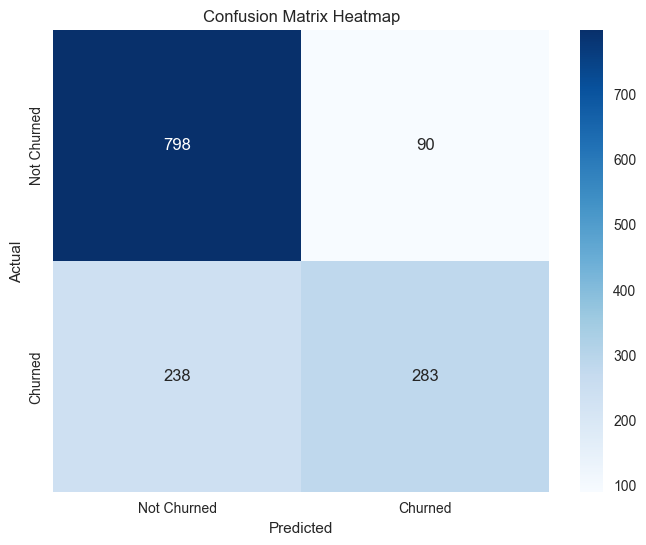

In [251]:
## heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusiom_mat, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')

#### THE ROC CURVE FOR SVM

In [252]:
## The reciever operating chararistics
from sklearn.metrics import roc_curve, roc_auc_score
# Predict probabilities for the positive class
y_pred_proba = svc_classifier.predict_proba(x_test)[:, 1]

In [253]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.84


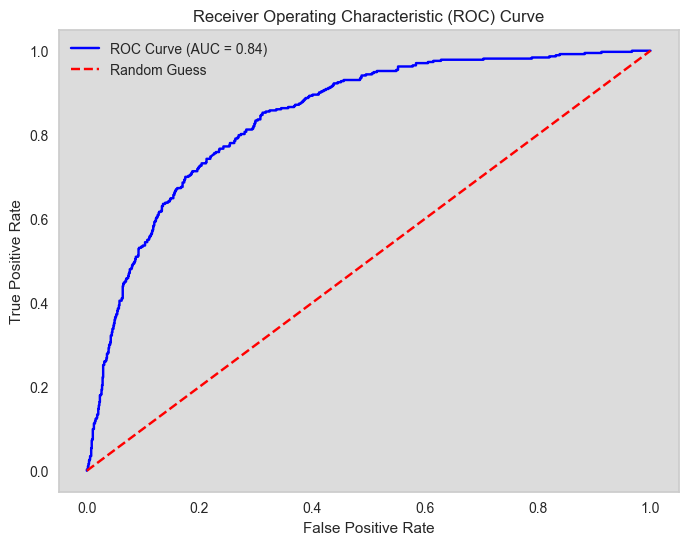

In [254]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Guess")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

In [255]:
from xgboost import XGBClassifier
## initiaze the model 
xgboost_classifier = XGBClassifier()
## fit the model
xgboost_classifier.fit(x_train_resample , y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [256]:
##### The Accuracy for Xgboost Classifier 
## making predictions 
y_pred_rc =   xgboost_classifier.predict(x_test)
## calling out thee accuracy attribute 
print(f'The Accuracy for XgBoost Classifier is {accuracy_score(y_pred_rc , y_test)}')

The Accuracy for XgBoost Classifier is 0.7743080198722498


#### Classification for Xgboost Classifier 


In [257]:
from sklearn.metrics import classification_report
print('Classiffication Report for Xgboost Classifier ')
print()
print(classification_report(y_pred_rc , y_test))
print('---------------------------------------------------------------------------------------------------------------------')

Classiffication Report for Xgboost Classifier 

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       978
           1       0.65      0.56      0.60       431

    accuracy                           0.77      1409
   macro avg       0.74      0.72      0.72      1409
weighted avg       0.77      0.77      0.77      1409

---------------------------------------------------------------------------------------------------------------------


#### Confusion Matrix for Xgboost Classifier 


In [258]:
from sklearn.metrics import confusion_matrix
confusiom_mat = confusion_matrix(y_pred_rc, y_test)
confusiom_mat

array([[848, 130],
       [188, 243]], dtype=int64)

Text(70.72222222222221, 0.5, 'Actual')

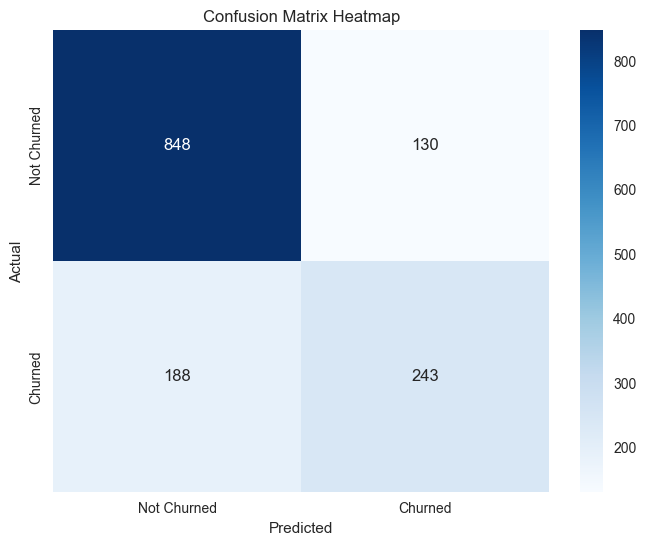

In [259]:
## heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusiom_mat, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')

##### ROC CURVE FOR XGBOOST

In [260]:
## The reciever operating chararistics
from sklearn.metrics import roc_curve, roc_auc_score
# Predict probabilities for the positive class
y_pred_proba = xgboost_classifier.predict_proba(x_test)[:, 1]

In [261]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.83


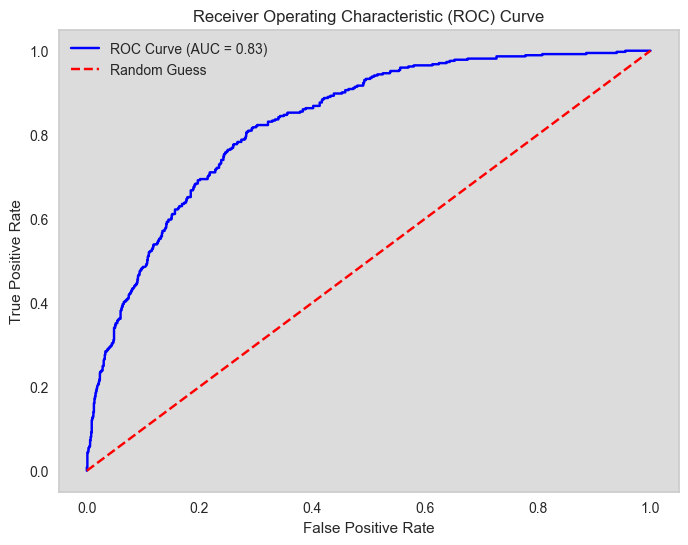

In [262]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Guess")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

#### Catboost Classifier

In [263]:
from catboost import CatBoostClassifier
### initialize the model 
catboost_classifier = CatBoostClassifier(silent=True)
## fit the data to our model 
catboost_classifier.fit(x_train_resample,y_train_resampled)

#### Accuracy for CatBoost Classifier

In [264]:
## making predictions 
y_pred =   catboost_classifier.predict(x_test)
## calling out thee accuracy attribute 
print(f'The Accuracy for CatBoost Classification  is {accuracy_score(y_pred , y_test)}')

The Accuracy for CatBoost Classification  is 0.7906316536550745


#### classification Report for CatBoost

In [265]:
from sklearn.metrics import classification_report
print('Classiffication Report for CatBoost')
print()
print(classification_report(y_pred , y_test))
print('---------------------------------------------------------------------------------------------------------------------')

Classiffication Report for CatBoost

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       947
           1       0.72      0.58      0.65       462

    accuracy                           0.79      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.78      0.79      0.78      1409

---------------------------------------------------------------------------------------------------------------------


#### Classification Report for CatBoost

In [266]:
from sklearn.metrics import confusion_matrix
confusiom_mat = confusion_matrix(y_pred, y_test)
confusiom_mat

array([[844, 103],
       [192, 270]], dtype=int64)

Text(70.72222222222221, 0.5, 'Actual')

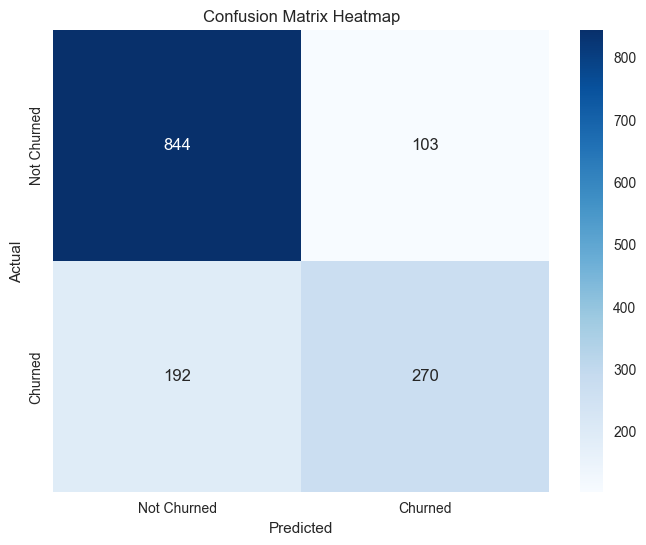

In [267]:
## heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusiom_mat, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')

#### ROC CURVE FOR CAT BOOST

In [268]:
## The reciever operating chararistics
from sklearn.metrics import roc_curve, roc_auc_score
# Predict probabilities for the positive class
y_pred_proba = catboost_classifier.predict_proba(x_test)[:, 1]

In [269]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

ROC AUC Score: 0.85


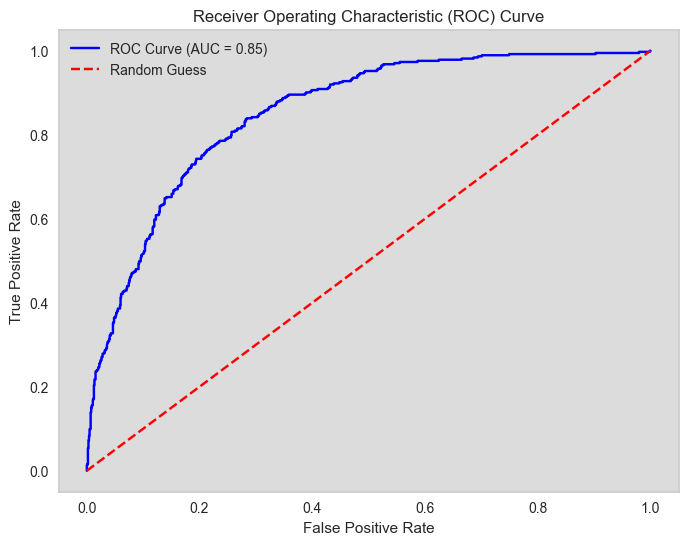

In [270]:
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Guess")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

#### HYPERAMETER TUNNING
- Hyperameter really takes long to run , i will try running on the GPU from google collab

In [272]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# # Define the model
# model = LogisticRegression(max_iter=1000)

# # Set hyperparameter grid
# param_grid = {
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'C': [0.01, 0.1, 1, 10, 100],
#     'solver': ['liblinear', 'saga']
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)

# # Perform tuning
# grid_search.fit(x_train_resample, y_train_resampled)

# # Best parameters and score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Accuracy:", grid_search.best_score_)


In [ ]:
# # Extract the best parameters
# best_params = grid_search.best_params_

# # Create a new Logistic Regression model with the best parameters
# final_model = LogisticRegression(**best_params, max_iter=1000)

# # Fit the final model on the training data
# final_model.fit(x_train_resample, y_train_resampled)

# # Evaluate the final model on the test data
# test_accuracy = final_model.score(x_test, y_test)
# print("Test Accuracy:", test_accuracy)


### DIFFERENCE WHEN PCA IS APPLIED

In [277]:
x_train_resample.shape,y_train.shape,x_test.shape,y_test.shape

((8276, 30), (5634,), (1409, 30), (1409,))

In [278]:
from sklearn.decomposition import PCA

# fitting the train data only
pca = PCA() 
x_train_pca = pca.fit_transform(x_train_resample)

# Transform the test data using the same PCA components
x_test_pca = pca.transform(x_test)




In [280]:
### getting the explained variance ratio 
explained_variace_ratio = pca.explained_variance_ratio_
print(f'The Sum of the explained variance ratio should be 1 : {np.sum(explained_variace_ratio)}')

The Sum of the explained variance ratio should be 1 : 0.9999999999999998


In [282]:
## getting the cumulative explaibed variance  
cumulative_explained_variance =  np.cumsum(explained_variace_ratio)
print(f'The cumulative explained variance should increase but never exceed 1:{cumulative_explained_variance}')

The cumulative explained variance should increase but never exceed 1:[0.30317963 0.46001307 0.53627264 0.58080869 0.62466751 0.66579174
 0.70224393 0.73601843 0.76575221 0.79453528 0.82056615 0.84566775
 0.86933911 0.89224538 0.91268605 0.93190604 0.9508581  0.9666511
 0.97965898 0.98892778 0.99673733 0.9997397  0.9999895  1.
 1.         1.         1.         1.         1.         1.        ]


In [320]:
## getting number of principle componets that explain 95 percent of the variance 
n_components =  np.argmax(cumulative_explained_variance>=0.95)+1
print(f'The Number of Principle components is {n_components}')

The Number of Principle components is 17


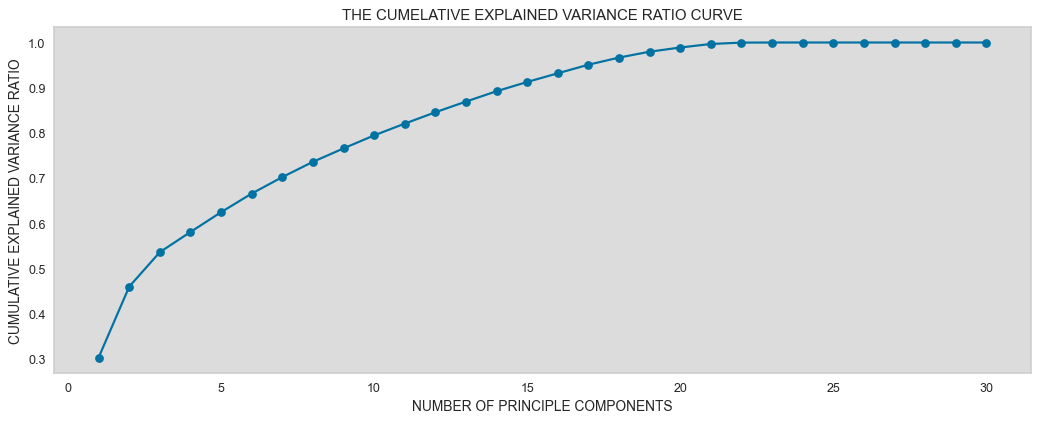

In [307]:
### plotting the cumulative explained varaiance ratio plot  
plt.figure(figsize=(14,5),dpi=90)
plt.plot(range(1,      len(cumulative_explained_variance)+1  ) ,              cumulative_explained_variance,    'bo-')
plt.title('THE CUMELATIVE EXPLAINED VARIANCE RATIO CURVE')
plt.xlabel('NUMBER OF PRINCIPLE COMPONENTS')
plt.ylabel('CUMULATIVE EXPLAINED VARIANCE RATIO')
plt.grid(visible=False)
plt.show()
          

In [321]:
# fitting the train data only
pca = PCA(n_components=n_components) 
x_train_pca = pca.fit_transform(x_train_resample)

# Transform the test data using the same PCA components
x_test_pca = pca.transform(x_test)



### BUILDING THE MODEL 

In [322]:
## define the modeel 
model = LogisticRegression()
## fit the model  
model.fit(x_train_pca , y_train_resampled)

LogisticRegression()

In [323]:
## making predictions 
y_pred =   model.predict(x_test_pca)
## calling out thee accuracy attribute 
print(f'The Accuracy for logistic Regression is {accuracy_score(y_pred , y_test)}')

The Accuracy for logistic Regression is 0.7636621717530163


In [324]:
from sklearn.metrics import classification_report
print('Classiffication Report for Logistic Regression')
print()
print(classification_report(y_pred , y_test))
print('---------------------------------------------------------------------------------------------------------------------')

Classiffication Report for Logistic Regression

              precision    recall  f1-score   support

           0       0.76      0.91      0.82       865
           1       0.78      0.54      0.64       544

    accuracy                           0.76      1409
   macro avg       0.77      0.72      0.73      1409
weighted avg       0.77      0.76      0.75      1409

---------------------------------------------------------------------------------------------------------------------
